In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [8]:
# Configurar rutas relativas
current_dir = os.path.dirname(os.path.abspath('__file__'))  # Directorio actual del notebook
root_dir = os.path.abspath(os.path.join(current_dir, '..', '..'))  # Directorio raíz del proyecto
data_path = os.path.join(root_dir, 'input', 'petfinder-adoption-prediction', 'train', 'train.csv')

# Cargar datos
try:
    df = pd.read_csv(data_path)
    print("✅ Dataset cargado correctamente")
except FileNotFoundError:
    print(f"❌ Error: No se encontró el archivo en {data_path}")

✅ Dataset cargado correctamente


In [22]:
# Obtener la cantidad de filas y columnas
filas, columnas = df.shape
print(f"El dataset tiene {filas} filas y {columnas} columnas.")

El dataset tiene 14993 filas y 24 columnas.


In [20]:
# Contar la cantidad de RescuerID únicos
cantidad_rescuerID_unicos = df['RescuerID'].nunique()

# Mostrar el resultado
print(f"Cantidad de RescuerID únicos: {cantidad_rescuerID_unicos}")

Cantidad de RescuerID únicos: 5595


In [24]:
# Resumen general del dataset
print("\n🔍 Información del dataset:")
df.info()

print("\n📊 Estadísticas descriptivas:")
display(df.describe(include='all').round(2))


🔍 Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13728 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 n

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
count,14993.00,13728,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,...,14993.00,14993.00,14993.00,14993.00,14993,14993.00,14980,14993,14993.00,14993.00
unique,NaN,9059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5595,NaN,14031,14993,NaN,NaN
top,NaN,Baby,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,fa90fa5b1ee11c86938398b60abc32cb,NaN,For Adoption,86e1089a3,NaN,NaN
freq,NaN,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,459,NaN,164,1,NaN,NaN
mean,1.46,NaN,10.45,265.27,74.01,1.78,2.23,3.22,1.88,1.86,...,1.04,1.58,21.26,41346.03,NaN,0.06,NaN,NaN,3.89,2.52
std,0.50,NaN,18.16,60.06,123.01,0.68,1.75,2.74,2.98,0.55,...,0.20,1.47,78.41,32.44,NaN,0.35,NaN,NaN,3.49,1.18
min,1.00,NaN,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,...,1.00,1.00,0.00,41324.00,NaN,0.00,NaN,NaN,0.00,0.00
25%,1.00,NaN,2.00,265.00,0.00,1.00,1.00,0.00,0.00,2.00,...,1.00,1.00,0.00,41326.00,NaN,0.00,NaN,NaN,2.00,2.00
50%,1.00,NaN,3.00,266.00,0.00,2.00,2.00,2.00,0.00,2.00,...,1.00,1.00,0.00,41326.00,NaN,0.00,NaN,NaN,3.00,2.00
75%,2.00,NaN,12.00,307.00,179.00,2.00,3.00,6.00,5.00,2.00,...,1.00,1.00,0.00,41401.00,NaN,0.00,NaN,NaN,5.00,4.00


In [19]:
# Agrupar por RescuerID y calcular la velocidad promedio de adopción
velocidad_promedio_adopcion = (
    df.groupby('RescuerID')['AdoptionSpeed']
    .mean()
    .reset_index()
    .rename(columns={'AdoptionSpeed': 'VelocidadPromedioAdopcion'})
)

# Ordenar por velocidad promedio de adopción (opcional)
velocidad_promedio_adopcion = velocidad_promedio_adopcion.sort_values(by='VelocidadPromedioAdopcion')

# Mostrar el resultado
display(velocidad_promedio_adopcion)

,RescuerID,VelocidadPromedioAdopcion
2547,7343163d903e8e8c079d588cba3464ee,0.0
3864,aed0dffcdad90d50b58d9ffb8206a28d,0.0
2922,841d36c916dd2eb1d13dcd513ac9e9a1,0.0
2920,8406f3915a4d8f1f921075529da4639a,0.0
3688,a6f3f2792cef6c934e6c9fa700a17c9d,0.0
...,...,...
1079,2ef8ee44430a8b2377cf3b65388ebd88,4.0
1078,2ee891efca61f393a78ca522ec3f920f,4.0
3529,9f33373a40f5ea8ec6699dd8c1954522,4.0
3517,9ea327a27c817903b8d6f9903b7f4e72,4.0


In [21]:
# Agrupar por RescuerID, contar apariciones y calcular velocidad promedio de adopción
top_rescatistas = (
    df.groupby('RescuerID')
    .agg(
        VecesAparicion=('RescuerID', 'size'),
        VelocidadPromedioAdopcion=('AdoptionSpeed', 'mean')
    )
    .reset_index()
)

# Ordenar por número de apariciones en orden descendente
top_rescatistas = top_rescatistas.sort_values(by='VecesAparicion', ascending=False)

# Obtener el top 20
top_20_rescatistas = top_rescatistas.head(20)

# Mostrar el resultado
display(top_20_rescatistas)

,RescuerID,VecesAparicion,VelocidadPromedioAdopcion
5485,fa90fa5b1ee11c86938398b60abc32cb,459,2.368192
3768,aa66486163b6cbc25ea62a34b11c9b91,315,2.603175
4228,c00756f2bdd8fa88fc9f07a8309f7d5d,231,2.376623
3996,b53c34474d9e24574bcec6a3d3306a0d,228,2.201754
5204,ee2747ce26468ec44c7194e7d1d9dad9,156,3.192308
3297,95481e953f8aed9ec3d16fc4509537e8,134,1.970149
4040,b770bac0ca797cf1433c48a35d30c4cb,111,1.837838
3547,a042471e0f43f2cf707104a1a138a7df,95,2.800000
5548,fd970cc91d06d82eebf046340137b272,93,2.236559
2799,7ed6d84e2e6879245e55447aee39c328,85,2.458824


In [18]:
# Filtrar filas donde el nombre sea exactamente "é»é» Hei Hei"
resultado = df.loc[df['Name'] == "é»é» Hei Hei"]
display(resultado)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
6867,2,é»é» Hei Hei,2,265,0,2,1,7,0,1,...,1,1,0,41401,3937a695ba7235b85e725d270455f0c8,0,pls give me one home,f0fde0412,1.0,3


In [13]:
display(df.iloc[9725, :].to_frame().T)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
9725,2,Am,3,285,265,1,5,0,0,1,...,1,1,300,41326,917525ed791dd0b927e07cda8059e125,0,he's adorable very like to cuddle and play a l...,e6c917eb2,4.0,4


In [17]:
# Mapear 1 y 2 a 'Perro' y 'Gato'
#data['tipo_animal'] = data['Type'].map({1: 'Perro', 2: 'Gato'})

# Agrupar, contar y calcular porcentaje
freq_percent = (
    df.groupby('Type')['Name']
    .value_counts(dropna=False)
    .rename('Frecuencia')
    .reset_index()
)

# Calcular porcentaje dentro de cada tipo
freq_percent['Porcentaje (%)'] = (
    freq_percent['Frecuencia'] /
    freq_percent.groupby('Type')['Frecuencia'].transform('sum') * 100
).round(2)

freq_percent = freq_percent.sort_values(by=['Type', 'Frecuencia'], ascending=[True, False])

freq_percent

,Type,Name,Frecuencia,Porcentaje (%)
0,1,NaN,653,8.03
1,1,Lucky,48,0.59
2,1,Puppy,45,0.55
3,1,Brownie,44,0.54
4,1,Max,35,0.43
...,...,...,...,...
9725,2,é»é» Hei Hei,1,0.01
9726,2,ð¸ð·ð Take Me PLEASE ð,1,0.01
9727,2,ðððð,1,0.01
9728,2,ððSolid Black Kittenðð,1,0.01


In [5]:
# 1. Análisis inicial
print("\n🔍 Dimensiones del dataset:", df.shape)
print("\n📝 Primeras filas:")
display(df.head(4))


🔍 Dimensiones del dataset: (14993, 24)

📝 Primeras filas:


,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2


In [12]:
# Quitamos duplicados
df.drop_duplicates(inplace=True)
print("\n🔍 Dimensiones del dataset sin duplicados:", df.shape)


🔍 Dimensiones del dataset sin duplicados: (14993, 24)


No se encontraron registros duplicados.

In [ ]:
df.dtypes # Nota: no es un método porque no tiene (), es un atributo

Type               int64
Name              object
Age                int64
Breed1             int64
Breed2             int64
Gender             int64
Color1             int64
Color2             int64
Color3             int64
MaturitySize       int64
FurLength          int64
Vaccinated         int64
Dewormed           int64
Sterilized         int64
Health             int64
Quantity           int64
Fee                int64
State              int64
RescuerID         object
VideoAmt           int64
Description       object
PetID             object
PhotoAmt         float64
AdoptionSpeed      int64
dtype: object

In [8]:
round(df.describe(),2)

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00
mean,1.46,10.45,265.27,74.01,1.78,2.23,3.22,1.88,1.86,1.47,1.73,1.56,1.91,1.04,1.58,21.26,41346.03,0.06,3.89,2.52
std,0.50,18.16,60.06,123.01,0.68,1.75,2.74,2.98,0.55,0.60,0.67,0.70,0.57,0.20,1.47,78.41,32.44,0.35,3.49,1.18
min,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,41324.00,0.00,0.00,0.00
25%,1.00,2.00,265.00,0.00,1.00,1.00,0.00,0.00,2.00,1.00,1.00,1.00,2.00,1.00,1.00,0.00,41326.00,0.00,2.00,2.00
50%,1.00,3.00,266.00,0.00,2.00,2.00,2.00,0.00,2.00,1.00,2.00,1.00,2.00,1.00,1.00,0.00,41326.00,0.00,3.00,2.00
75%,2.00,12.00,307.00,179.00,2.00,3.00,6.00,5.00,2.00,2.00,2.00,2.00,2.00,1.00,1.00,0.00,41401.00,0.00,5.00,4.00
max,2.00,255.00,307.00,307.00,3.00,7.00,7.00,7.00,4.00,3.00,3.00,3.00,3.00,3.00,20.00,3000.00,41415.00,8.00,30.00,4.00


In [10]:
# Missings
df.count()

Type             14993
Name             13728
Age              14993
Breed1           14993
Breed2           14993
Gender           14993
Color1           14993
Color2           14993
Color3           14993
MaturitySize     14993
FurLength        14993
Vaccinated       14993
Dewormed         14993
Sterilized       14993
Health           14993
Quantity         14993
Fee              14993
State            14993
RescuerID        14993
VideoAmt         14993
Description      14980
PetID            14993
PhotoAmt         14993
AdoptionSpeed    14993
dtype: int64

Se observa que en la feature "Name" hay 1265 registros con valores faltantes, y en Description hay 13 valores faltantes.

In [11]:
# Otra forma:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13728 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

In [15]:
# 2. Detección de valores nulos
null_report = pd.DataFrame({
    'Valores_Nulos': df.isnull().sum(),
    'Porcentaje_Nulos': round(df.isnull().mean() * 100, 2)
}).sort_values('Porcentaje_Nulos', ascending=False)

print("\n📊 Reporte de valores nulos:")
display(null_report[null_report['Valores_Nulos'] > 0])


📊 Reporte de valores nulos:


,Valores_Nulos,Porcentaje_Nulos
Name,1265,8.44
Description,13,0.09


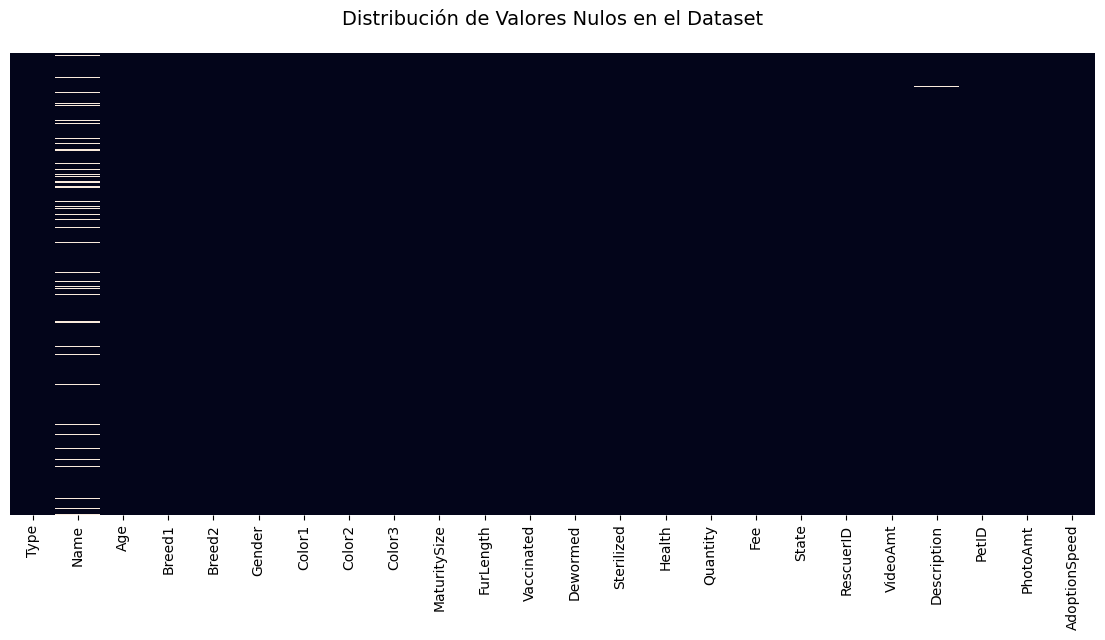

In [16]:
# 3. Visualización interactiva
plt.figure(figsize=(14, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='rocket', yticklabels=False)
plt.title('Distribución de Valores Nulos en el Dataset', pad=20, fontsize=14)
plt.show()

In [17]:
# 4. Toma de decisiones por columna
decisiones = {
    'Name': {
        'accion': 'Imputar "Sin_Nombre"',
        'justificacion': '8.44% de nulos, variable categórica no crítica',
        'codigo': "df['Name'] = df['Name'].fillna('Sin_Nombre')"
    },
    'Description': {
        'accion': 'Crear bandera + imputar texto',
        'justificacion': 'x% de nulos, útil para NLP pero preservar registros',
        'codigo': '''
df['Descripcion_Faltante'] = df['Description'].isnull().astype(int)
df['Description'] = df['Description'].fillna('Descripción no disponible')
        '''
    }
}

In [18]:
# 5. Implementación de decisiones
print("\n🛠️ Aplicando transformaciones:")

# Nombre
df['Name'] = df['Name'].fillna('Sin_Nombre')
print("- Nulos en 'Name' después de imputación:", df['Name'].isnull().sum())

# Descripción
df['Descripcion_Faltante'] = df['Description'].isnull().astype(int)
df['Description'] = df['Description'].fillna('Descripción no disponible')
print("- Nulos en 'Description' después de imputación:", df['Description'].isnull().sum())

# 6. Manejo de valores cero especiales
print("\n🔍 Análisis de valores cero:")
cero_analysis = pd.DataFrame({
    'Breed2': (df['Breed2'] == 0).mean() * 100,
    'Color2': (df['Color2'] == 0).mean() * 100,
    'Color3': (df['Color3'] == 0).mean() * 100
}, index=['% Ceros']).T.round(2)

display(cero_analysis)

print("\n🔧 Transformando ceros a categorías:")
for col in ['Breed2', 'Color2', 'Color3']:
    df[f'Tiene_{col}'] = (df[col] != 0).astype(int)
df.drop(columns=['Breed2', 'Color2', 'Color3'], inplace=True)




🛠️ Aplicando transformaciones:
- Nulos en 'Name' después de imputación: 0
- Nulos en 'Description' después de imputación: 0

🔍 Análisis de valores cero:


,% Ceros
Breed2,71.78
Color2,29.82
Color3,70.73



🔧 Transformando ceros a categorías:


In [9]:
# 7. Eliminación de columnas
cols_to_drop = ['RescuerID', 'PetID', 'VideoAmt']
df.drop(columns=cols_to_drop, inplace=True)
print("\n🗑️ Columnas eliminadas:", cols_to_drop)

# 8. Validación final
assert df.isnull().sum().sum() == 0, "¡Error: Aún existen valores nulos!"
print("\n✅ Validación exitosa - Dataset limpio")


🗑️ Columnas eliminadas: ['RescuerID', 'PetID', 'VideoAmt']

✅ Validación exitosa - Dataset limpio


In [ ]:
# 9. Guardar resultados
output_dir = os.path.join(root_dir, 'output', 'preprocessed_data')
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, 'train_preprocesado.csv')
df.to_csv(output_path, index=False)

print(f"\n💾 Dataset guardado en: {output_path}")
print("🎯 Proceso completado exitosamente")